# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(arr):
    if len(np.where(arr==0)[0]) == 0:
        print(None)
    else:
        return np.max(arr[np.setdiff1d(np.where(x==0)[0][:-1] + 1, np.where(x==0)[0][:-1])])

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

In [5]:
y = np.array([1, 2, 3, 9, 5, 4])
max_element(y)

None


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [6]:
def nearest_value(X, v):
    A = X.flatten()
    diffs = np.abs(A - v)
    return A[np.where(diffs == np.min(diffs))[0][0]]

In [7]:
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

In [8]:
X = np.array([1, 2, 10, -4, -15, 3, 6, 3]).reshape((4, 2))
v = -20
nearest_value(X, v)

-15

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [9]:
def scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    if len(np.where(std==0)[0]) != 0:
        print('Предупреждение: не во всех столбцах стандартное отклонение отлично от нуля')
        return (X - mean) / std
    else:
        return (X - mean) / std

In [10]:
X = np.random.randint(low=1, high=10, size=(2, 5))
print(X)
scale(X)

[[7 5 1 7 3]
 [9 4 1 2 2]]
Предупреждение: не во всех столбцах стандартное отклонение отлично от нуля


array([[ -1.,   1.,  nan,   1.,   1.],
       [  1.,  -1.,  nan,  -1.,  -1.]])

In [11]:
X = np.random.randint(low=-5, high=5, size=(2, 5))
print(X)
scale(X)

[[-5  0 -2  1  4]
 [-1 -3 -4  3 -3]]


array([[-1.,  1.,  1., -1.,  1.],
       [ 1., -1., -1.,  1., -1.]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [12]:
def get_stats(X):
    det = np.linalg.det(X)
    tr = np.trace(X)
    minimum = np.min(X)
    maximum = np.max(X)
    norm = np.linalg.norm(X, ord='fro')
    eig = np.linalg.eig(X)
    inv = np.linalg.inv(X)
    return det, tr, minimum, maximum, norm, eig, inv

In [13]:
X = np.random.normal(loc=10, scale=1, size=9).reshape((3, 3))
print(X)

get_stats(X)

[[ 11.6784014   10.33952217   8.93740228]
 [  9.09352693  11.82965124   9.1706    ]
 [ 10.29437006  10.28187992   9.40843747]]


(37.370059157622507,
 32.916490101780639,
 8.9374022786538969,
 11.829651237223638,
 30.497713480125704,
 (array([ 30.3542215 ,   1.92158173,   0.64068687]),
  array([[-0.58957395, -0.58804191, -0.14403019],
         [-0.57182166,  0.76970861, -0.55463967],
         [-0.57045819, -0.24850626,  0.81953044]])),
 array([[ 0.45511102, -0.14411138, -0.29185744],
        [ 0.23681179,  0.4782059 , -0.69107302],
        [-0.7567624 , -0.36491923,  1.1808569 ]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [14]:
maxs = 0
qs = 0

for exp_num in range(100):
    A = np.random.normal(loc=0, scale=1, size=100).reshape((10, 10))
    B = np.random.normal(loc=0, scale=1, size=100).reshape((10, 10))
    C = A @ B
    
    mx = np.max(C)
    q = np.percentile(C, q=95)
    
    maxs = np.hstack((maxs, mx))
    qs = np.hstack((qs, q))
    
mean_maxs = np.mean(maxs[1:])
mean_qs = np.mean(qs[1:])

print("Среднее у максимальных эелементов: {:.3}".format(mean_maxs))
print("Среднее у 95-процентных квантилей: {:.3}".format(mean_qs))

Среднее у максимальных эелементов: 8.36
Среднее у 95-процентных квантилей: 4.98


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [15]:
import pandas as pd

Загрузим данные и посмотрим на них:

In [16]:
df = pd.read_csv('2008.csv')
pd.set_option('display.max_columns', 100)
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,N633SW,174.0,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,N421UA,199.0,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Проверим, есть ли в данных пропущенные значения:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
Year                 70000 non-null int64
Month                70000 non-null int64
DayofMonth           70000 non-null int64
DayOfWeek            70000 non-null int64
DepTime              68601 non-null float64
CRSDepTime           70000 non-null int64
ArrTime              68444 non-null float64
CRSArrTime           70000 non-null int64
UniqueCarrier        70000 non-null object
FlightNum            70000 non-null int64
TailNum              69180 non-null object
ActualElapsedTime    68418 non-null float64
CRSElapsedTime       69991 non-null float64
AirTime              68418 non-null float64
ArrDelay             68418 non-null float64
DepDelay             68601 non-null float64
Origin               70000 non-null object
Dest                 70000 non-null object
Distance             70000 non-null int64
TaxiIn               68444 non-null float64
TaxiOut              68594 non-

Из таблицы видно, что не все признаки содержат 70000 значений, то есть пропущенные данные есть.

In [18]:
print('Всего в таблице пропущено {0} значений'.format(df.isnull().sum().sum()))

Всего в таблице пропущено 355215 значений


In [19]:
print('{0} объектов имеют хотя бы один пропуск'.format(df.isnull().any(axis=1).sum()))

70000 объектов имеют хотя бы один пропуск


In [20]:
print('{0} признаков имеют хотя бы одно пропущенное значение'.format(df.isnull().any(axis=0).sum()))

16 признаков имеют хотя бы одно пропущенное значение


Но как следует из таблицы, действительно пропущенные значения содержатся в столбцах `DepTime`, `ArrTime`, `DepDelay`, `TailNum`, `TaxiIn`, `TaxiOut`, то есть количество пропущенных значений разнится и очевидной причины для этого нет. Напротив, пропуски в `ActualElapsedTime`, `AirTime` и `ArrDelay` должны быть как-то связаны, потому что для каждого признака их ровно 68418, что подозрительно. В столбце `CancellationCode` содержится только 1411 значений, поскольку этот признак соответсвует только отменённым рейсам. Чтобы понять, есть ли действительно пропущенные значения в этом признаке надо посчитать, сколько самолётов было отмнено, и сравнить полученные резульаты:

In [21]:
df[df['Cancelled']!=0].shape[0]

1411

Получили, что для каждого отменённого самолёта указана причина отмены, так что пропуски «условны» и их можно воспринимать как признак того, что рейс не отменён.

Что касается столбцов `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, то для них указаны значения только тогда, когда рейс задерживался более чем на 15 минут:

In [22]:
df[np.isnan(df['CarrierDelay'])==False].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
10,2008,11,16,7,2042.0,2000,35.0,2355,WN,3596,N325SW,173.0,175.0,146.0,40.0,42.0,MDW,FLL,1166,5.0,22.0,0,NaN,0,40.0,0.0,0.0,0.0,0.0
12,2008,12,23,2,1101.0,1050,1554.0,1535,FL,52,N316AT,233.0,225.0,218.0,19.0,11.0,BWI,SJU,1565,4.0,11.0,0,NaN,0,11.0,0.0,8.0,0.0,0.0
17,2008,7,8,2,1951.0,1950,2203.0,2111,US,1632,N957UW,132.0,81.0,59.0,52.0,1.0,CLT,IAD,321,8.0,65.0,0,NaN,0,0.0,1.0,51.0,0.0,0.0
23,2008,5,19,1,2032.0,2000,2207.0,2146,US,1528,N532AU,95.0,106.0,71.0,21.0,32.0,CLT,PHL,448,3.0,21.0,0,NaN,0,0.0,0.0,0.0,0.0,21.0


In [23]:
df[(df['ArrDelay']>13) & (df['ArrDelay']<17)][['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].head()

,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
34,16.0,0.0,0.0,16.0,0.0,0.0
40,16.0,0.0,0.0,16.0,0.0,0.0
57,14.0,NaN,NaN,NaN,NaN,NaN
64,15.0,0.0,0.0,15.0,0.0,0.0
67,14.0,NaN,NaN,NaN,NaN,NaN


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [24]:
print('В целевой переменной DepDelay {0} пропущенных значений'.format(df['DepDelay'].isnull().sum()))

В целевой переменной DepDelay 1399 пропущенных значений


Посмотрим на объекты, у которых отсутствует значение целевой переменной:

In [25]:
df[df['DepDelay'].isnull()==True].head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,NaN,NaN,155.0,NaN,NaN,NaN,DFW,MIA,1121,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,N683BR,NaN,100.0,NaN,NaN,NaN,ATL,CAK,528,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,N990AT,NaN,85.0,NaN,NaN,NaN,BOS,BWI,370,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,N526US,NaN,98.0,NaN,NaN,NaN,MDW,MSP,349,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,NaN,NaN,87.0,NaN,NaN,NaN,DSM,ORD,299,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,NaN,NaN,99.0,NaN,NaN,NaN,CLE,ORD,316,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,N528CA,NaN,112.0,NaN,NaN,NaN,LGA,RDU,431,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,N728SK,NaN,153.0,NaN,NaN,NaN,EUG,DEN,997,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,NaN,NaN,110.0,NaN,NaN,NaN,DFW,COS,592,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,NaN,NaN,75.0,NaN,NaN,NaN,OAK,ONT,361,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Заметим, что первые десять рейсов были отменены. Проверим, верно ли это для остальных:

In [26]:
np.sum(df[df['DepDelay'].isnull()==True]['Cancelled']==1)

1399

Получили, что все рейсы, для которых не указано время задержки, были отменены. В связи с этим, нет необходимости в признаках `Cancelled` и `CancellationCode`.

In [27]:
X = df[(df['DepDelay']!=0) & (df['DepDelay'].isnull()==False)]
y = X['DepDelay']
X.drop(['Cancelled', 'CancellationCode', 'DepDelay'], axis=1, inplace=True)

In [28]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN


Также заметим, что в матрице объекты-признаки есть признаки со строковыми значениями. В дальнейшем при обучении это может вызвать проблемы. Посмотрим, сколько уникальных значений в таких признаках. Если их число невилико, то имеет смысл применить one-hot-encoding, если же велико, то такой признак проще удалить, так как вряд ли столь большое количество бинарных переменных улучшит качество модели.

In [29]:
print('В столбце UniqueCarrier {0} уникальных значений'.format(X.UniqueCarrier.unique().shape[0]))
print('В столбце Origin {0} уникальных значений'.format(X.Origin.unique().shape[0]))
print('В столбце Dest {0} уникальных значений'.format(X.Dest.unique().shape[0]))

В столбце UniqueCarrier 20 уникальных значений
В столбце Origin 296 уникальных значений
В столбце Dest 298 уникальных значений


Получаем, что столбцы `Origin` и `Dest` проще удалить, так и посутпим:

In [30]:
X.drop(['Origin', 'Dest'], axis=1, inplace=True)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [31]:
def get_minutes(col):
    return col.apply(lambda x: int(str(int(x))[-2:]))

def get_hours(col):
    '''
    В данной функции необходимо отдельно учесть случай, когда время начинается с 0,
    так как функция int() в такой ситуации ничего не возвращает
    '''
    col = col.apply(lambda x: str(int(x))[:-2]) 
    for i in col.index:
        if not col[i]:
            col[i] = 0
        else:
            col[i] = int(col[i])
    return col

In [32]:
X['DepTime_Hour'] = get_hours(X['DepTime'])
X['DepTime_Minute'] = get_minutes(X['DepTime'])

X['CRSDepTime_Hour'] = get_hours(X['CRSDepTime'])
X['CRSDepTime_Minute'] = get_minutes(X['CRSDepTime'])

# Объекты с nan для ArrTime обрабатываются отедльно, чтобы не усложнять функцию:
# в остальных столбцах пропущенных значений нет

X['ArrTime_Hour'] = get_hours(X['ArrTime'].dropna())
X['ArrTime_Minute'] = get_minutes(X['ArrTime'].dropna())

for i in X[X['ArrTime'].isnull() == True]['ArrTime'].index:
    X['ArrTime_Hour'][i] = np.nan
    X['ArrTime_Minute'][i] = np.nan

X['CRSArrTime_Hour'] = get_hours(X['CRSArrTime'])
X['CRSArrTime_Minute'] = get_minutes(X['CRSArrTime'])

X.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=1, inplace=True)

In [33]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,8.0,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,21,11,20,55,23,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,2.0,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN,14,26,14,10,17,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,-19.0,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN,11,43,11,45,15,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,-12.0,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN,11,41,11,44,13,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,-17.0,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN,8,15,8,20,12,43.0,13,0


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Из описания следует, что признаки `DepDelay` и `ArrDelay` должны быть связаны: вылетев поздно, самолёт, скорее всего, и прилетит поздно. Посчитаем коэффециент корреляции между ними:

In [34]:
print('Коэффициент корреляции между DepDelay и ArrDelay равен {:.2}'.format \
      (np.corrcoef(X['ArrDelay'].dropna(), y[X[X['ArrDelay'].isnull() != True].index])[0,1]))

Коэффициент корреляции между DepDelay и ArrDelay равен 0.93


Больше очевидно коррелерующих с целевой переменной признаков, кажется, нет. Чтобы убедиться в этом, можно посмотреть, как коррелируют между собой признаки. Если найдётся такой признак, у которого высокая корреляция с `ArrDelay`, то и с целевой переменной он коррелирует. Также можно найти группы коррелирующих признаков в датафрейме и проверить только один из них на корреляцию с `DepDelay`.

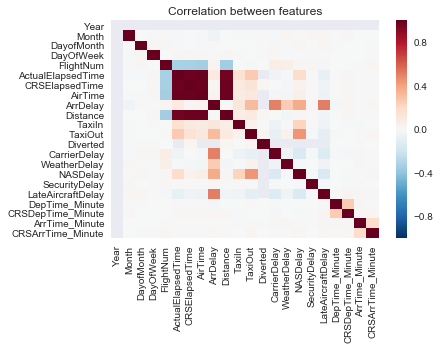

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(X.corr())
plt.title('Correlation between features')

Группа `ActualElapsedTime`, `CRSEapsedTime`, `AirTime` и `Distance` выделена тёмным по очевидным причинам: первые три признаки почти полностью совпадают, а время связано с дистанцией полёта. И все они связаны с `FlightNum`, но не с `ArrDelay`.

Пожалуй, имеет смысл проверить только признаки `CarrierDelay` и `LateAircraftDelay`, поскольку их корреляция с `ArrDelay` достигает 0.5.

In [36]:
print('Коэффициент корреляции между DepDelay и CarrierDelay равен {:.2}'.format \
      (np.corrcoef(X['CarrierDelay'].dropna(), y[X[X['CarrierDelay'].isnull() != True].index])[0,1]))
print('Коэффициент корреляции между DepDelay и LateAircraftDelay равен {:.2}'.format \
      (np.corrcoef(X['LateAircraftDelay'].dropna(), y[X[X['LateAircraftDelay'].isnull() != True].index])[0,1]))

Коэффициент корреляции между DepDelay и CarrierDelay равен 0.53
Коэффициент корреляции между DepDelay и LateAircraftDelay равен 0.55


Будем считать, что корреляция этих признаков с целевой переменной не достаточно высока, чтобы оказывать чересчур значимое влияние на прогноз. Поэтому удалим только признаки, указанные в задании, и `ArrDelay`:

In [37]:
X.drop(['ArrDelay', 'TailNum', 'Year'], axis=1, inplace=True)

In [38]:
X.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,21,11,20,55,23,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN,14,26,14,10,17,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN,11,43,11,45,15,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN,11,41,11,44,13,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN,8,15,8,20,12,43.0,13,0


Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

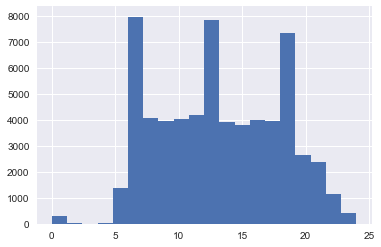

In [39]:
X['DepTime_Hour'].hist(bins=20)

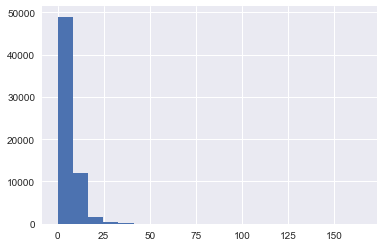

In [40]:
X['TaxiIn'].hist(bins=20)

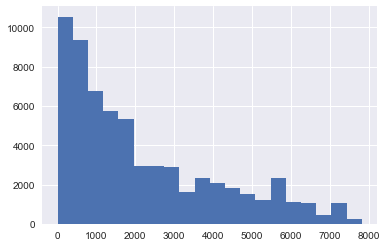

In [41]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Из гистограмм видно, что распределение признаков разнится: те, что связаны с часами, лежат в диапозоне от 0 до 24; те, что с минутами, – от 0 до 59; признаки `TaxiIn` и `TaxiOut` достигают значения 150, а значения столбца `FlightNum` варьируются от 0 до 8000. Следовательно эти признаки оказывают разное влиянние на веса в обычной линейной регрессии.

Более того, масштабирование признаков при использовании метода градиентного спуска ускоряет его работу: можно представить проекцию квадратичного функционала качества от двух признаков, с большим и маленьким разбросом – она будет выглядеть как вытянутые овалы, и градиент будет долго спускаться к центру. Если же признаки отмасштабированы, то проекции больше напоминают круги, и градиент сходится к оптимуму быстрее.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [42]:
X.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
DepTime_Hour          object
DepTime_Minute         int64
CRSDepTime_Hour       object
CRSDepTime_Minute      int64
ArrTime_Hour          object
ArrTime_Minute       float64
CRSArrTime_Hour       object
CRSArrTime_Minute      int64
dtype: object

Поменяем типы значений переменных для удобства в дальнейшем использовании.

Отмечу, что признаки, связанные со временем, можно трактовать двояко: с одной стороны, они числовые, поэтому их можно отнормировать и обучать таким образом регрессию, а можно считать категориальными (несмотря на то, что в задании 9 они отнесены к вещественным), так как они принимают значения из фиксированного целочисленного диапозона. Попробовав первый вариант, в котором оказалось 93 столбца, я получила, что качество как на обучении так и на контроле довольно высоко (порядка 0.93-0.95 в обоих случаях), и никаких проблем не обнаружилось. Во втором же случае я столкнулась с проблемой переобучения, которая, вероятно, имелась в виду в задании, и решилась с помощью `Lasso` и `Ridge` регрессий, так что в итоге, признаки времени закодированы как категориальные.

In [43]:
X.Month = X.Month.astype('category')
X.DayofMonth = X.DayofMonth.astype('category')
X.DayOfWeek = X.DayOfWeek.astype('category')
X.UniqueCarrier = X.UniqueCarrier.astype('category')
X.Diverted = X.Diverted.astype('category')

#X.DepTime_Hour = X.DepTime_Hour.astype('int')
#X.DepTime_Minute = X.DepTime_Minute.astype('int')
#X.CRSDepTime_Hour = X.CRSDepTime_Hour.astype('int')
#X.CRSDepTime_Minute = X.CRSDepTime_Minute.astype('int')
#X.ArrTime_Hour = X.ArrTime_Hour.astype('float')
#X.ArrTime_Minute = X.ArrTime_Minute.astype('float')
#X.CRSArrTime_Hour = X.CRSArrTime_Hour.astype('int')
#X.CRSArrTime_Minute = X.CRSArrTime_Minute.astype('int')

X.DepTime_Hour = X.DepTime_Hour.astype('category')
X.DepTime_Minute = X.DepTime_Minute.astype('category')
X.CRSDepTime_Hour = X.CRSDepTime_Hour.astype('category')
X.CRSDepTime_Minute = X.CRSDepTime_Minute.astype('category')
X.ArrTime_Hour = X.ArrTime_Hour.astype('category')
X.ArrTime_Minute = X.ArrTime_Minute.astype('category')
X.CRSArrTime_Hour = X.CRSArrTime_Hour.astype('category')
X.CRSArrTime_Minute = X.CRSArrTime_Minute.astype('category')

In [44]:
X.dtypes

Month                category
DayofMonth           category
DayOfWeek            category
UniqueCarrier        category
FlightNum               int64
ActualElapsedTime     float64
CRSElapsedTime        float64
AirTime               float64
Distance                int64
TaxiIn                float64
TaxiOut               float64
Diverted             category
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
DepTime_Hour         category
DepTime_Minute       category
CRSDepTime_Hour      category
CRSDepTime_Minute    category
ArrTime_Hour         category
ArrTime_Minute       category
CRSArrTime_Hour      category
CRSArrTime_Minute    category
dtype: object

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def transform_data(data):
    for i in data.columns:
        if data[i].dtype.name == 'category':
            data[i] = data[i].fillna(np.nan)
            data = pd.concat([data, pd.get_dummies(data[i])], axis=1)
            data  = data.drop(i, axis=1)
        else:
            data[i] = data[i].fillna(0)
            data[i] = scaler.fit_transform(data[i])
    return data 

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [46]:
X = transform_data(X)

/Users/ola/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ola/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ola/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

In [47]:
print('Количесвто признаков после преобразования: {0}'.format(X.shape[1]))

Количесвто признаков после преобразования: 423


In [48]:
X.head()

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,-0.189761,-0.077726,-0.225831,-0.018753,-0.235882,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,-0.189761,-0.077726,-0.225831,-0.018753,-0.235882,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,-0.189761,-0.077726,-0.225831,-0.018753,-0.235882,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,-0.189761,-0.077726,-0.225831,-0.018753,-0.235882,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,-0.189761,-0.077726,-0.225831,-0.018753,-0.235882,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def regression(reg, X_train, X_test, y_train, y_test):
    reg.fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('На обучающей выборке R2 равен: {:.2}'.format(r2_score(y_train, y_pred_train)))
    print('На обучающей выборке MSE равен: {:.4}'.format(mean_squared_error(y_train, y_pred_train)))
    print('На контрольной выборке R2 равен: {:.2}'.format(r2_score(y_test, y_pred_test)))
    print('На контрольной выборке MSE равен: {:.4}'.format(mean_squared_error(y_test, y_pred_test)))
    
    return reg.coef_

In [51]:
coefs = regression(reg=LinearRegression(), X_train=X[:1000], X_test=X[1000:], y_train=y[:1000], y_test=y[1000:])

На обучающей выборке R2 равен: 1.0
На обучающей выборке MSE равен: 1.261e-24
На контрольной выборке R2 равен: 0.12
На контрольной выборке MSE равен: 1.144e+03


In [52]:
np.set_printoptions(precision=4, suppress=True)
coefs

array([  -0.    ,   -0.    ,    0.    ,    0.    ,   -0.    ,    0.    ,
          0.    ,    0.    ,   -0.    ,    0.    ,   -0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,   -0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,   -0.    ,   -0.    ,   -0.    ,   -0.    ,   -0.    ,
         -0.    ,   -0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    , 

Качество модели высоко на обучающей выборке и сильно хуже на контроле, что свидетельствует о переобучении модели. В этом можно убедиться, посмотрев на коэффициенты: среди них много трехзначных, что подтверждает гипотезу.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [53]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

In [54]:
lasso = LassoCV(cv=kf, n_jobs=-1)
lasso.fit(X[:1000], y[:1000])
y_pred_train_lasso = lasso.predict(X[:1000])
y_pred_test_lasso = lasso.predict(X[1000:])

best_alpha_lasso = lasso.alpha_

print('Лучшее значение параметра регуляризации: {:.3}'.format(best_alpha_lasso))
print()
print('На обучающей выборке R2 равен: {:.2}'.format(r2_score(y[:1000], y_pred_train_lasso)))
print('На обучающей выборке MSE равен: {:.4}'.format(mean_squared_error(y[:1000], y_pred_train_lasso)))
print('На контрольной выборке R2 равен: {:.2}'.format(r2_score(y[1000:], y_pred_test_lasso)))
print('На контрольной выборке MSE равен: {:.4}'.format(mean_squared_error(y[1000:], y_pred_test_lasso)))

Лучшее значение параметра регуляризации: 0.0529

На обучающей выборке R2 равен: 0.94
На обучающей выборке MSE равен: 53.91
На контрольной выборке R2 равен: 0.93
На контрольной выборке MSE равен: 85.09


In [55]:
alpha_grid = np.logspace(-1, 2, 15)

ridge = RidgeCV(alphas=alpha_grid, cv=kf)
ridge.fit(X[:1000], y[:1000])
y_pred_train_ridge = ridge.predict(X[:1000])
y_pred_test_ridge = ridge.predict(X[1000:])

best_alpha_ridge = ridge.alpha_

print('Лучшее значение параметра регуляризации: {:.3}'.format(best_alpha_ridge))
print()
print('На обучающей выборке R2 равен: {:.2}'.format(r2_score(y[:1000], y_pred_train_ridge)))
print('На обучающей выборке MSE равен: {:.4}'.format(mean_squared_error(y[:1000], y_pred_train_ridge)))
print('На контрольной выборке R2 равен: {:.2}'.format(r2_score(y[1000:], y_pred_test_ridge)))
print('На контрольной выборке MSE равен: {:.4}'.format(mean_squared_error(y[1000:], y_pred_test_ridge)))

Лучшее значение параметра регуляризации: 13.9

На обучающей выборке R2 равен: 0.95
На обучающей выборке MSE равен: 44.81
На контрольной выборке R2 равен: 0.93
На контрольной выборке MSE равен: 93.62


Оживлённая дискуссия в чате сподвигла меня дополнительно построить графики зависимости коэффициента R2 от значения параметра alpha. К счастью, у меня проблем не возникло :)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

params_lasso = {'alpha': np.linspace(0.01, 3, 100)}
gs_lasso = GridSearchCV(estimator=Lasso(), param_grid=params_lasso, scoring='r2', cv=kf)
gs_lasso.fit(X[:1000], y[:1000])

params_ridge = {'alpha': np.linspace(5, 27, 100)}
gs_ridge = GridSearchCV(estimator=Ridge(), param_grid=params_ridge, scoring='r2', cv=kf)
gs_ridge.fit(X[:1000], y[:1000])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  5.     ,   5.22222, ...,  26.77778,  27.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

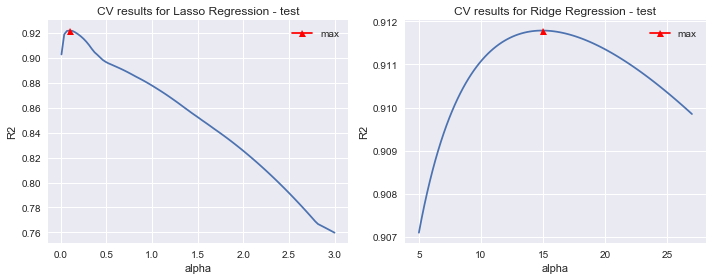

In [57]:
f, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(gs_lasso.cv_results_['param_alpha'].data, gs_lasso.cv_results_['mean_test_score'])
axes[0].plot(gs_lasso.cv_results_['param_alpha'].data[gs_lasso.cv_results_['mean_test_score'].argmax()],
        gs_lasso.cv_results_['mean_test_score'].max(), marker='^', color='r', label='max')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[0].set_title('CV results for Lasso Regression - test')

axes[1].plot(gs_ridge.cv_results_['param_alpha'].data, gs_ridge.cv_results_['mean_test_score'])
axes[1].plot(gs_ridge.cv_results_['param_alpha'].data[gs_ridge.cv_results_['mean_test_score'].argmax()],
        gs_ridge.cv_results_['mean_test_score'].max(), marker='^', color='r', label='max')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('R2')
axes[1].legend()
axes[1].set_title('CV results for Ridge Regression - test')

plt.tight_layout()

In [58]:
print('Лучшее значение параметра регуляризации для Lasso: {:.3}'.format(gs_lasso.best_params_['alpha']))
print('Лучшее значение параметра регуляризации для Ridge: {:.3}'.format(gs_ridge.best_params_['alpha']))

Лучшее значение параметра регуляризации для Lasso: 0.101
Лучшее значение параметра регуляризации для Ridge: 15.0


Лучшие параметры оказались близки, как и ожидалось.

С помощью регуляризации удалось выровнять значения ошибок на обучении и контроле, а значит, и решить проблему переобучения.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [59]:
X_train['a0'] = np.ones(X_train.shape[0])
X_test['a0'] = np.ones(X_test.shape[0])

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [60]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X @ w

In [61]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    y_hat = make_pred(X, w)
    error = y - y_hat
    return np.mean((error / y) ** 2)

In [62]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    y_hat = make_pred(X, w)
    error = y - y_hat
    return -2 * X.T.dot(error / (y ** 2)) / X.shape[0]

In [63]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    y_hat = make_pred(X, w)
    error = y - y_hat
    return np.mean((error / y) ** 2) + w.T @ w

In [64]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    y_hat = make_pred(X, w)
    error = y - y_hat
    return -2 * X.T.dot(error / (y ** 2)) / X.shape[0] + 2 * w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [65]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    
    X, y = X.values, y.values
    
    qs = []        # лист для значений функционала
    q_previous = 0 # начальное значение функционала
    diff = 10      # начальное значение улучшения функционала (случайное, больше eps)
    i = 0
    
    while (i < max_iter) & (diff > eps):
        if is_reg == True:
            q = get_reg_func(w0, X, y)    # считаем значение регуляризованного функционала
            diff = abs(q_previous - q)    # находим приращение регуляризованного функционала
            q_previous = q              
            grad = get_reg_grad(w0, X, y) # считаем градиент регуляризованного функционала
        else:
            q = get_func(w0, X, y)        # считаем значение функционала
            diff = abs(q_previous - q)    # находим приращение функционала
            q_previous = q
            grad = get_grad(w0, X, y)     # считаем градиент функционала
            
        w0 = w0 - step_size * grad         # обновляем значения весов
        qs.append(q)
        i+=1
        
    return w0, qs

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [66]:
step_size = np.array([0.001, 1, 10])

def fit_plot(X, y, w0, eps, max_iter, title):
    # для графиков
    fig, axs = plt.subplots(3, 2, figsize=(14, 10))
    fig.subplots_adjust(hspace = .5, wspace=.5)
    axs = axs.ravel()
    plt.suptitle(title, size=13)
    
    # списки для значений функционала
    qs = []
    qs_reg = []
    
    # считаем и рисуем результаты для обычного функционала
    for i in range(0, len(step_size)*2, 2):
        w, q = grad_descent(X, y, w0, step_size=step_size[int(i/2)], max_iter=max_iter, is_reg=False, eps=eps)
        axs[i].plot(q)
        axs[i].set_yticks((np.asarray(q).min() - 0.01, np.asarray(q).max() + 0.01))
        axs[i].title.set_text('No regularization, step_size={0}'.format(step_size[int(i/2)]))
        axs[i].set_xlabel('Iteration number')
        axs[i].set_ylabel('MSPE')
        
        qs.append(np.mean(q))
        
    # считаем и рисуем результаты для регуляризованного функционала
    for i in range(1, len(step_size)*2+1, 2):
        w, q = grad_descent(X, y, w0, step_size=step_size[int(i//2)], max_iter=max_iter, is_reg=True, eps=eps)
        axs[i].plot(q)
        axs[i].set_yticks((np.asarray(q).min() - 0.01, np.asarray(q).max() + 0.01))
        axs[i].title.set_text('L2-regularization, step_size={0}'.format(step_size[int(i//2)]))
        axs[i].set_xlabel('Iteration number')
        axs[i].set_ylabel('MSPE regularized')
        
        qs_reg.append(np.mean(q))
    
    # находим лучшие параметры
    min_q = np.asarray(qs).min()
    best_step = step_size[np.argmin(min_q)]
    min_q_reg = np.asarray(qs_reg).min()
    best_step_reg = step_size[np.argmin(min_q_reg)]
    
    print('Минимальная ошибка для MSPE: {:.4}'.format(min_q))
    print('Лучшее значение step_size: {}'.format(best_step))
    print()
    print('Минимальная ошибка для MSPE-reg: {:.4}'.format(min_q_reg))
    print('Лучшее значение step_size: {}'.format(best_step_reg))
    return min_q, best_step, min_q_reg, best_step_reg, qs, qs_reg

Минимальная ошибка для MSPE: 0.8595
Лучшее значение step_size: 0.001

Минимальная ошибка для MSPE-reg: 0.9953
Лучшее значение step_size: 0.001


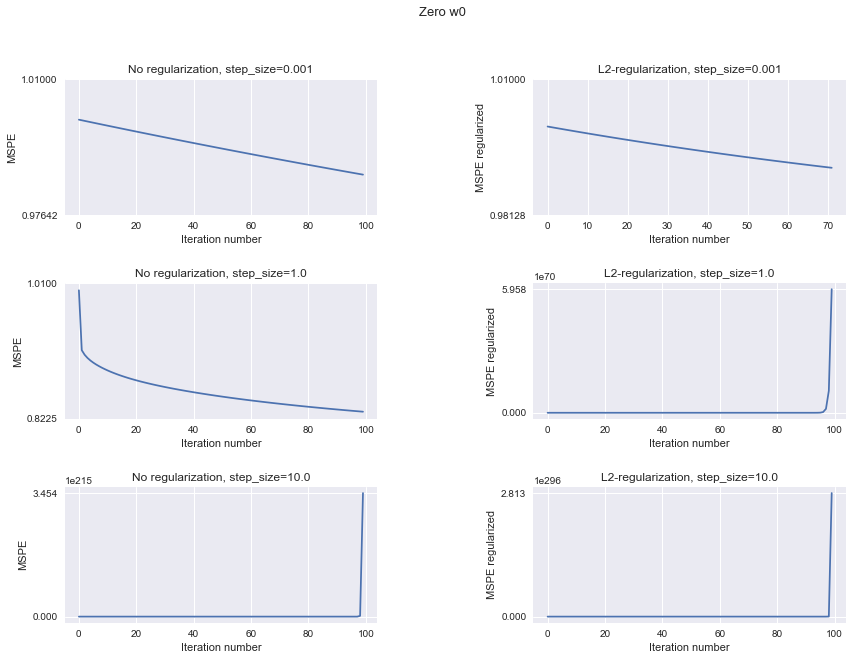

In [67]:
a, b, c, d, qs, qs_reg = fit_plot(X_train, y_train, np.zeros((X_train.shape[1])), 
                      max_iter=100, eps=0.0001, title='Zero w0')

Для нулевых весов получили, что градиент с MPSE без регуляризации не сходится при шаге равном 10, поскольку он слишком большой и градиент не может спуститься к точке оптимума при таком значении. Заметим, что в оставшихся случаях критерием останова послужило максимальное количество итераций, то есть качество должно быть ещё лучше.

Для случая с регуляризацией сходимость наблюдается только при наименьшем шаге, причём в этой ситуации остановка произошла из-за низкого прироста функционала качества. Отмечу, что для графиков справа на оси ординат расположен регуляризованный MSPE, то есть если вычесть норму весов, то получим превосходство в качестве модели с регуляризованным функционалом.

Минимальная ошибка для MSPE: 5.177
Лучшее значение step_size: 0.001

Минимальная ошибка для MSPE-reg: 2.999e+03
Лучшее значение step_size: 0.001


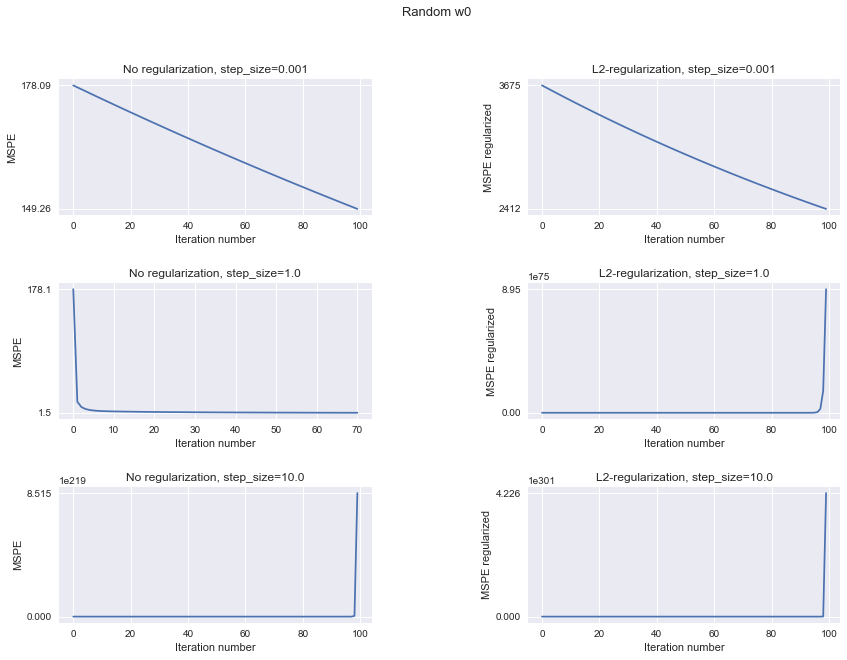

In [68]:
a, b, c, d, e, f = fit_plot(X_train, y_train, np.random.rand(X_train.shape[1])*5, 
                            max_iter=100, eps=0.01, title='Random w0')

Полностью налогичная ситуация по сходимости наблюдается при случайных весах. Различия небольшие: для обычного MSPE градиент сошёлся при шаге равном 1. В остальных случаях, где наблюдается сходимость, стоит ожидать, что при большем значении максимально допустимого числа итераций ошибка должна упасть сильнее.

Также важно отметить, что от выбора начальных весов сильно зависит значение ошибки: при нулевых весах она не превышала единицы. А в данном случае, значение MSPE можно изменять, увеличивая или уменьшая начальные веса.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

Обучим модели с нулевыми и случайными весами при шаге 0.1, так как из приведённого выше анализа он кажется наиболее оптимальным в плане качества и скорости сходимости.

Значение MSPE на контрольной выборке для модели без регуляризации равно 0.873
Количество итераций: 226

Значение MSPE на контрольной выборке для модели с MSPE-reg равно 0.955
Количество итераций: 10


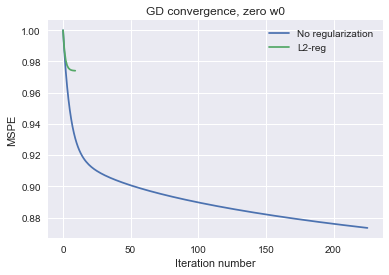

In [69]:
w0 = np.zeros((X_train.shape[1]))

w, q = grad_descent(X_train, y_train, w0, step_size=0.1, 
                    max_iter=10000, eps=0.0001, is_reg=False)

w_reg, q_reg = grad_descent(X_train, y_train, w0, step_size=0.1, 
                            max_iter=10000, eps=0.0001, is_reg=True)

plt.plot(q, label='No regularization')
plt.plot(q_reg, label='L2-reg')
plt.xlabel('Iteration number')
plt.ylabel('MSPE')
plt.title('GD convergence, zero w0')
plt.legend()

print('Значение MSPE на контрольной выборке для модели без регуляризации равно {:.3}'.format \
      (get_func(w, X_test, y_test)))
print('Количество итераций: {0}'.format(len(q)))

print()

print('Значение MSPE на контрольной выборке для модели с MSPE-reg равно {:.3}'.format \
      (get_func(w_reg, X_test, y_test)))
print('Количество итераций: {0}'.format(len(q_reg)))

Из графика следует, что при нулевых весах градиент с регуляризованным функционалом сходится значительно быстрее. Это можно объяснить тем, что веса при регуляризации меньше, чем без неё, поэтому заданное уменьшение значения функционала также достигается быстрее.

Значение MSPE на контрольной выборке для модели без регуляризации равно 0.874
Количество итераций: 533

Значение MSPE на контрольной выборке для модели с MSPE-reg равно 0.954
Количество итераций: 31


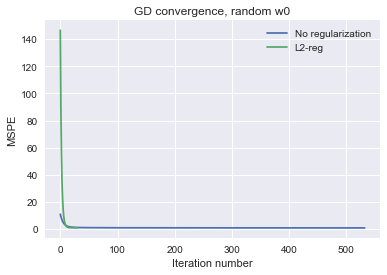

In [70]:
w0 = np.random.rand(X_train.shape[1])

w, q = grad_descent(X_train, y_train, w0, step_size=0.1, 
                    max_iter=10000, eps=0.0001, is_reg=False)

w_reg, q_reg = grad_descent(X_train, y_train, w0, step_size=0.1, 
                            max_iter=10000, eps=0.0001, is_reg=True)

plt.plot(q, label='No regularization')
plt.plot(q_reg, label='L2-reg')
plt.xlabel('Iteration number')
plt.ylabel('MSPE')
plt.title('GD convergence, random w0')
plt.legend()

print('Значение MSPE на контрольной выборке для модели без регуляризации равно {:.3}'.format \
      (get_func(w, X_test, y_test)))
print('Количество итераций: {0}'.format(len(q)))

print()

print('Значение MSPE на контрольной выборке для модели с MSPE-reg равно {:.3}'.format \
      (get_func(w_reg, X_test, y_test)))
print('Количество итераций: {0}'.format(len(q_reg)))

Качественно ситуация не отличается от предыдущего пункта. Однако из-за положительных весов на первой итерации MSPE принимает большое значение в начале, сильно снижаясь уже к приблизительно 20 итерации.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [71]:
from sklearn.utils import shuffle

# написано в соответсвии с алгоритмом iterative sgd,
# изложенном на вики: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

def sgd(X, y, step_size, max_iter, eps, is_reg):
    
    n = X.shape[0]
    X, y = X.values, y.values # переведём в numpy-матрицы
    
    w0 = np.random.rand(X.shape[1]) * 10 # начальные веса, выбираются случайно
    #w0 = np.zeros((X_train.shape[1]))
    qs = []
    q_previous = 0
    diff = 10
    i = 0
    
    while (i < max_iter) & (diff > eps):
        
        X, y = shuffle(X, y) # перемешиваем выборку
        
        for j in range(0, n-1):       # проход по каждому объекту выборки
            if is_reg == True:
                q = get_reg_func(w0, X[j], y[j]) # считаем занчение регуляризованного MSPE
                diff = abs(q_previous - q) # считаем приращение регуляризованного MSPE
                q_previous = q
                grad = get_reg_grad(w0, X[j], y[j]) # считаем градиент регуляризованного MSPE 
            else:
                q = get_func(w0, X[j], y[j]) # считаем занчение MSPE
                diff = abs(q_previous - q) # считаем приращение MSPE
                q_previous = q
                grad = get_grad(w0, X[j], y[j]) # считаем градиент MSPE 
            
            w0 = w0 - step_size * grad # обновляем веса после каждого объекта
            if j % 20 == 0:
                qs.append(q) # будем записывать ошибки для каждого 20-ого объекта
            
        i+=1
        
    return w0, qs, i

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

На контрольной выборке R2 равен: 0.49
На контрольной выборке MSE равен: 650.11
На контрольной выборке MSPE равен: 1.1282e+04


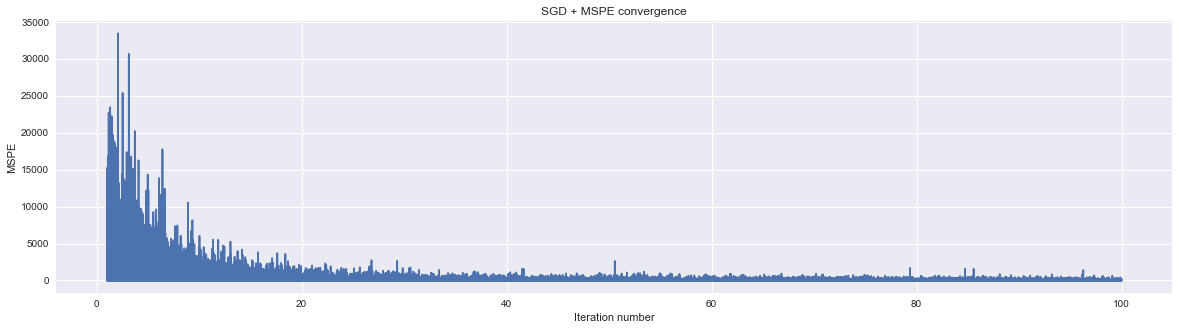

In [72]:
w, q, i = sgd(X_train, y_train, step_size=0.001, max_iter=100, is_reg=False, eps=0.01)

plt.figure(figsize=(20,5))
plt.plot(np.linspace(1, i, len(q)), q)
plt.xlabel('Iteration number')
plt.ylabel('MSPE')
plt.title('SGD + MSPE convergence')

print('На контрольной выборке R2 равен: {:.2}'.format(r2_score(y_test, make_pred(X_test, w))))
print('На контрольной выборке MSE равен: {:.5}'.format(mean_squared_error(y_test, make_pred(X_test, w))))
print('На контрольной выборке MSPE равен: {:.5}'.format(get_reg_func(w, X_test, y_test)))

На контрольной выборке R2 равен: -0.087
На контрольной выборке MSE равен: 1394.1
На контрольной выборке MSPE равен: 1.0114


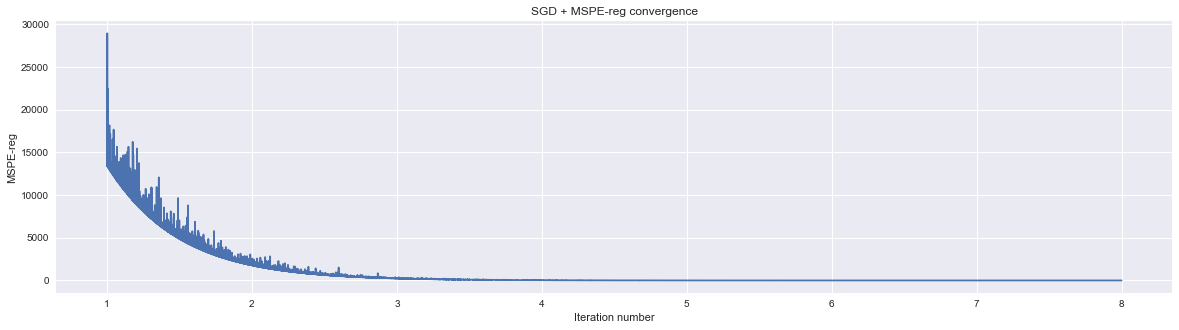

In [73]:
w_reg, q_reg, i = sgd(X_train, y_train, step_size=0.00001, max_iter=100, is_reg=True, eps=0.01)

plt.figure(figsize=(20,5))
plt.plot(np.linspace(1, i, len(q_reg)), q_reg)
plt.xlabel('Iteration number')
plt.ylabel('MSPE-reg')
plt.title('SGD + MSPE-reg convergence')

print('На контрольной выборке R2 равен: {:.2}'.format(r2_score(y_test, make_pred(X_test, w_reg))))
print('На контрольной выборке MSE равен: {:.5}'.format(mean_squared_error(y_test, make_pred(X_test, w_reg))))
print('На контрольной выборке MSPE равен: {:.5}'.format(get_func(w_reg, X_test, y_test)))

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

Из графиков выше следует, что SGD с регуляризованной MSPE сходится за 8 итераций, против 100 у обычной. Причины аналогичны изложенным ранее: значение имеет величина весов, а при регуляризации они меньше.

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [74]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSPE на контрольной выборке равно: {:.5}'.format(get_func(reg.coef_, X_test, y_test)))

MSPE на контрольной выборке равно: 4.2407e+25


MSPE в пункте 17 не превышало 1.

Линейная регрессия в SKlearn - это обычный МНК, то есть по обучающей выборке подбирается прямая, дающая наименьшую величину квадрата ошибок. Как известно она даёт не впечатляющие результаты, когда, например, в матрице X есть коррелирующие признаки. Как было показано в одном из пунктов решения, такие признаки в нашей матрице есть. Отсюда и плохой результат.